# **Cours : Analyse en Composantes Principales (PCA)**

## **1. Introduction**
La **PCA** (*Principal Component Analysis*) est une méthode de réduction de dimension qui transforme un jeu de données initial en un nouveau système de coordonnées où :
- Les nouvelles variables (**composantes principales**) sont des combinaisons linéaires des variables initiales.
- Elles sont orthogonales entre elles.
- Elles sont ordonnées de façon à expliquer le maximum de variance.

**Objectif :**
- Réduire la dimension tout en conservant l’essentiel de l’information.
- Décorréler les variables.
- Visualiser les données dans un espace réduit.

---

## **2. Formulation mathématique**

### **2.1 Notations**
- $X \in \mathbb{R}^{n \times p}$ : matrice de données ($n$ observations, $p$ variables).
- $\bar{X}$ : matrice centrée (chaque colonne a une moyenne nulle).

On suppose $X$ **centré** :
$$
X_c = X - \mathbf{1} \mu^T
$$
où $\mu$ est le vecteur des moyennes par colonne.

---

### **2.2 Variance et covariance**
La matrice de covariance est :
$$
\Sigma = \frac{1}{n-1} X_c^T X_c
$$

---

### **2.3 Problème à résoudre**
On cherche une direction $\mathbf{w}_1$ qui maximise la variance projetée :
$$
\max_{\mathbf{w}_1} \quad \mathrm{Var}(X_c \mathbf{w}_1) \quad \text{sous contrainte} \quad \|\mathbf{w}_1\| = 1
$$
Ce problème se résout par **valeurs propres** :
$$
\Sigma \mathbf{w}_1 = \lambda_1 \mathbf{w}_1
$$
- $\lambda_1$ : variance expliquée par la 1ʳᵉ composante.
- $\mathbf{w}_1$ : vecteur propre associé.

Les composantes suivantes $\mathbf{w}_2, \mathbf{w}_3, \dots$ sont trouvées de la même manière avec contrainte d’orthogonalité.

---

### **2.4 Résultat**
- Les **valeurs propres** $\lambda_j$ mesurent la variance expliquée.
- Les **vecteurs propres** $\mathbf{w}_j$ sont les directions principales.

---

## **3. Étapes d'une PCA**
1. **Centrage** (et éventuellement **normalisation** si les variables ont des unités différentes).
2. Calcul de la **matrice de covariance** $\Sigma$.
3. Résolution de :
   $$
   \Sigma \mathbf{w} = \lambda \mathbf{w}
   $$
4. Tri des valeurs propres en ordre décroissant.
5. Choix du nombre de composantes $k$ selon le **taux de variance expliquée** :
   $$
   \text{TVE}(k) = \frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^p \lambda_j}
   $$
6. Projection :
   $$
   Z = X_c W_k
   $$
   où $W_k$ contient les $k$ vecteurs propres.

---

## **4. Liens avec l’algèbre linéaire**
La PCA est équivalente à la **SVD** (*Singular Value Decomposition*) :
$$
X_c = U S V^T
$$
- Les vecteurs propres $V$ de $\Sigma$ correspondent aux colonnes de $V$ en SVD.
- Les valeurs singulières $S$ donnent les racines carrées des variances.

---

## **5. Interprétation**
- **Scores** : coordonnées des données dans l’espace des composantes principales.
- **Loadings** : contribution de chaque variable à chaque composante.
- **Variance expliquée cumulée** : permet de choisir $k$.

---

## **7. Points pratiques**
- **Centrage obligatoire**, normalisation si échelles différentes.
- PCA est sensible aux **outliers**.
- Choix du nombre de composantes via **variance expliquée** (>80% souvent).

---

## **8. Avantages / Limites**
✅ **Avantages** :
- Décorrèle les variables.
- Réduction de dimension pour la visualisation.
- Bruit réduit.

⚠️ **Limites** :
- Interprétation des composantes parfois difficile.
- Hypothèse de linéarité.
- Sensible aux valeurs aberrantes.


Variance expliquée : [0.91219168 0.08780832]


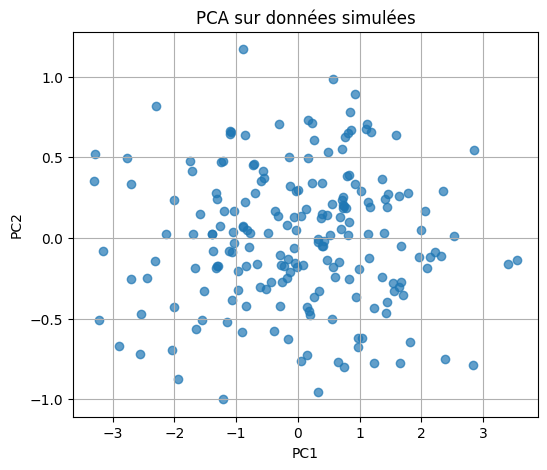

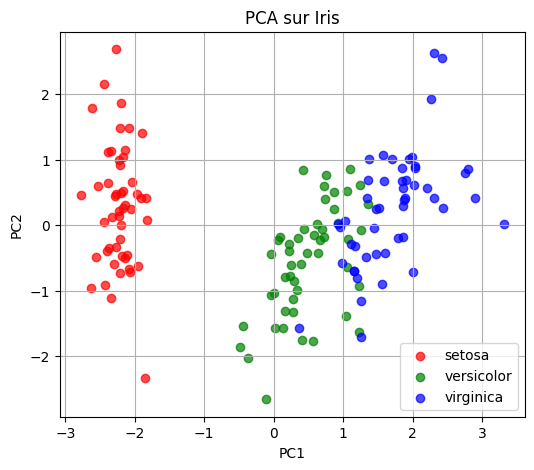

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# ==== Données simulées ====
np.random.seed(0)
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # matrice de covariance
X_sim = np.random.multivariate_normal(mean, cov, 200)

# PCA avec sklearn
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sim)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variance expliquée :", pca.explained_variance_ratio_)

# Visualisation
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA sur données simulées")
plt.grid(True)
plt.show()

# ==== Données réelles : Iris ====
iris = load_iris()
X = iris.data
y = iris.target
X_scaled = StandardScaler().fit_transform(X)

pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
for label, color in zip(np.unique(y), ['red', 'green', 'blue']):
    plt.scatter(X_iris_pca[y == label, 0], X_iris_pca[y == label, 1], label=iris.target_names[label], alpha=0.7, color=color)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA sur Iris")
plt.grid(True)
plt.show()
